Import packages

In [22]:
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import argparse
import imutils # for image resizing
import time
import cv2
import sys

Function to display images in notebooks

In [23]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Detecting ArUco markers

In [24]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image containing ArUCo tag")
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to detect")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "./images/DICT_5X5_100_ORIGINAL.png",
    "type": "DICT_5X5_100",
}

# also try DICT_ARUCO_ORIGINAL for the id24 marker

In [25]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [26]:
# load the input image from disk and resize it
print("[INFO] loading image...")
image = cv2.imread(args["image"])
# resize to 600 for noise reduction, but if too small the markers are undetectable
# you may need to increase the resolution of the image
# as images get smaller, the aruco marker needs to get bigger
image = imutils.resize(image, width=600)

# check the dictionary for cli argument validity, verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# load the ArUCo dictionary, grab the ArUCo parameters, and detect
# the markers
print("[INFO] detecting '{}' tags...".format(args["type"]))
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])
arucoParams = cv2.aruco.DetectorParameters_create()
# this is where the magic happens
# pass in the original image, the dictionary we loaded as parameters, returns 3 tuple
# list of lists of the 4 corners of the aruco markers
# ids == the aruco marker id, rejected is false positive for false positive or for ML training
(corners, ids, rejected) = cv2.aruco.detectMarkers(image, arucoDict,
	parameters=arucoParams)

[INFO] loading image...
[INFO] detecting 'DICT_5X5_100' tags...


[INFO] ArUco marker ID: 70


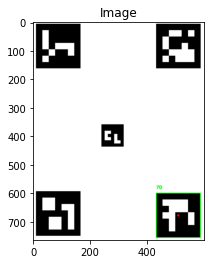

[INFO] ArUco marker ID: 66


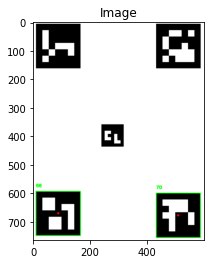

[INFO] ArUco marker ID: 87


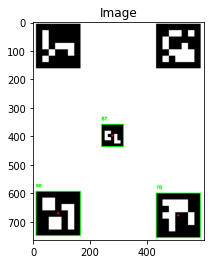

[INFO] ArUco marker ID: 42


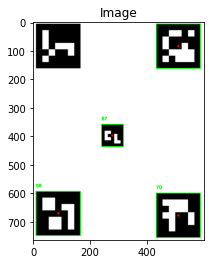

In [27]:
# verify *at least* one ArUco marker was detected
if len(corners) > 0:
	# flatten the ArUco IDs list
	ids = ids.flatten()

	# loop over the detected ArUCo corners
	for (markerCorner, markerID) in zip(corners, ids):
		# extract the marker corners (which are always returned in
		# top-left, top-right, bottom-right, and bottom-left order)
		# convert to 4x2 array; opencv stipulates order to return
		corners = markerCorner.reshape((4, 2))
		# below are numpy data tags and MUST be converted to python integers
		(topLeft, topRight, bottomRight, bottomLeft) = corners

		# convert each of the (x, y)-coordinate pairs to integers
		topRight = (int(topRight[0]), int(topRight[1]))
		bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
		bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
		topLeft = (int(topLeft[0]), int(topLeft[1]))

		# draw the bounding box of the ArUCo detection
		cv2.line(image, topLeft, topRight, (0, 255, 0), 2)
		cv2.line(image, topRight, bottomRight, (0, 255, 0), 2)
		cv2.line(image, bottomRight, bottomLeft, (0, 255, 0), 2)
		cv2.line(image, bottomLeft, topLeft, (0, 255, 0), 2)

		# compute and draw the center (x, y)-coordinates of the ArUco
		# marker
		cX = int((topLeft[0] + bottomRight[0]) / 2.0)
		cY = int((topLeft[1] + bottomRight[1]) / 2.0)
		cv2.circle(image, (cX, cY), 4, (0, 0, 255), -1)

		# draw the ArUco marker ID on the image
		cv2.putText(image, str(markerID),
			(topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 0), 2)
		print("[INFO] ArUco marker ID: {}".format(markerID))

		# show the output image
		plt_imshow("Image", image)